In [0]:
%tensorflow_version 1.x
# Si la prédiction n'est pas rapide ( > 1s ), probablement qu'il faut installer tensorflow-gpu
#!pip uninstall -y tensorflow==2.2.0
#!pip uninstall -y tensorflow
#!pip install tensorflow-gpu=1.14

TensorFlow is already loaded. Please restart the runtime to change versions.


# Importer les packages nécessaires.

In [0]:
from keras.models import load_model
from keras.preprocessing.image import (load_img, img_to_array)
import tensorflow as tf
import util_v2 as util
import util as ut
from train.build_train import (build_model_net, WeightReader)
import cv2
import predict_video
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from numpy import expand_dims
from os.path import isdir
from os import mkdir

### Copier depuis le Drive le modèle et initier le modèle dans la variable:  `model`.



In [0]:
!cp drive/"My Drive"/amodelzzz/model.h5 model.h5
model = load_model('model.h5')

### Ou bien copier seulement les poids, construire le modèle puis charger ces poids dans le modèle.

In [0]:
!cp drive/"My Drive"/amodelzzz/model_weights_only.h5 .
#construire le modèle
model = build_model_net()
# charger les poids dans le modèle construit.
model.load_weights('model_weights_only.h5')

### Définir une fonction qui lit les labels(classes) depuis un txt.

In [0]:
def read_labels(f):
  labels_file = open(f,'r')
  labels_list = labels_file.read().split('\n')
  labels_list.pop()
  return labels_list

### Lire les labels et initialiser le input_shape: la taille d'entrée d'image.

In [0]:
labels = read_labels('labels.txt')
input_shape = (416, 416)

### Définir des masks et les anchors boxes associés, ainsi que les deux seuils: class_threshold et iou_threshold.

In [0]:
# Chaque élément du mask représente les 3 indices des éléments de la liste anchors.
# masks nous aide à utiliser, à chaque scale de prédiction, les 3 anchors correspondant au scale.
# par exemple le [6, 7, 8] sont les indices des éléments de anchors pour la prédiction au 1er scale.
masks = [[6, 7, 8], [3, 4, 5], [0, 1, 2]]
anchors = [[10, 13], [16, 30], [33, 23], [30, 61], [62, 45],
           [59, 119], [116, 90], [156, 198], [373, 326]]
class_threshold = .6
iou_threshold = .5

### Instancier la classe `classe_util` qui contient les fonctions nécessaires pour faire la prédiction.

In [0]:
img_p = util.classe_util(class_threshold, iou_threshold, labels, model)

### Téléchargement d'une photo exemple.

In [0]:
!curl https://i0.wp.com/post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/London-face-masks-epidemic-1024x683.jpg --output t.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  143k  100  143k    0     0  2810k      0 --:--:-- --:--:-- --:--:-- 2810k


### Prédiction.
- La première fois de prédiction prend plus de temps que les prédictions d'après.
Après avoir utilisé la variable du modèle: `model` une fois pour la prédiction, toutes les prédictions suivantes seront rapides.


person (0.998)
person (0.997)
person (0.996)
person (0.984)
person (0.805)
person (0.747)
person (0.732)
person (0.717)


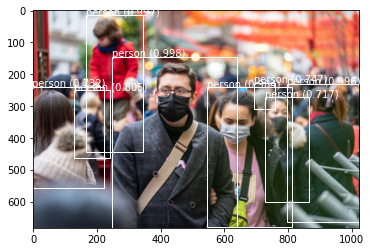

2.8513903617858887


In [0]:
f= "t.jpg"
b = time.time()
img_p.predict_and_plot(f)
print(time.time()-b)

### Instancier la classe qui contient les fonctions nécessaires pour la prédictions des vidéos.

In [0]:
vid_p = predict_video.pred_classe(class_threshold, iou_threshold, labels, model)

In [0]:
f_video = 'library1.mp4'
t0 = time.time()
nf= vid_p.predict_and_write_video(f_video)
tmax = time.time()

In [0]:
delta_t = tmax - t0
print("Total of frames calculated: {}.".format(nf))
print("Temps écoulé: {0:.3f}.".format(delta_t))
print("Temps écoulé par frame: {0:.3f}s.".format(delta_t/nf))

Total of frames calculated: 69.
Temps écoulé: 8.505.
Temps écoulé par frame: 0.123s.


### Prédiction d'une image et écriture du résultats dans un fichier image dans le lien: `/output/filename.jpg`

In [0]:
b = time.time()
img_p.predict_and_write_image(f)
print(time.time()-b)

0.16605806350708008
